*This file contains informations about what needs to be done for the transfer learning of SRNet using the code provided by Jan Butora.*

## <u>LitModel.py</u><br>
This file contains the full model used for transfer learning on SRNet. It follows LightningModule way of organizing the code.

### Learning rate
The way the learning rate evolves during training can be set with *lr_scheduler_name* parameter (line 201 configure_optimizers function).

### IL_train & IL_test
I must update the **WORK_DIR** constant used in this file (it is used line 266 and 268).<br>
The files IL_val.p, IL_train.p and IL_test.p should be in $WORK/DataBase/BOSSBase512/<br>
Either I do all changes in code by changing hard coded path with the path of my directories and I change **WORK_DIR** or I just change **WORK_DIR** and modify my folder structure. <span style="color: red">**I will probably change the code and not the directories.**</span>

## <u>IL_train.p, IL_val.p & IL_test.p</u>
This files contains the names of the files in binary that are used for training, validation and test respectively. They have the ".pgm" extension at the end which needs to be removed if we work with other file extension.
I'll probably need to code something myself in order to load my .pt files for the training.

~~~python
# Loading and putting file names in IL_train
import pickle
IL_train = []
with open(path_to_IL_train.p) as handle:
    IL_train.extend(pickle.load(handle))

>> print(IL_train[:5])
['8373.pgm', '4708.pgm', '8632.pgm', '7926.pgm', '1061.pgm']
~~~

## How is the difference between cover and stego made ??
IL_train only contains names but doesn't indicate if the file is stego or cover. I don't know where the difference is made in the code.

## SRNet training organization
### Folder structure
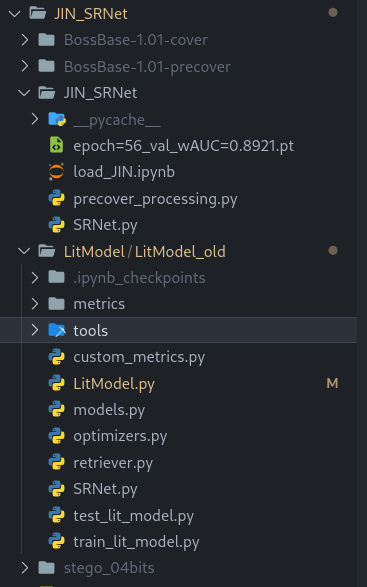

BossBase-1.01-precover: .pgm files from the BOSSBase dataset<br>
BossBase-1.01-cover: .pt files, torch tensors of shape (1,3,512,512) .pgm file -> torch tensor -> cover file = ImageCompressor(torch tensor)<br>
stego_04bits: stego images = ImageCompressorSteganography(p).forward(pgm_file.toTensor())

### What must be done
<ul>
    <li> Write my own Retriever
    <li> Load images as np arrays
    <li> Train the model
</ul>

### Loading saved tensors as NumPy arrays
```python 
import torch
"""
Images are stored as tensors of shape (1,channels,heigth,width)
The first axis is useless but this is how the tensors are outputed by the ImageCompressor model used to generate cover and stego images
The images are already normalized so I don't need to divide by 255.0
"""
img_t = torch.load(path_to_pt_file)
img_np = img_t[0].permute(1,2,0).cpu().numpy() # numpy array with values between 0 and 1
```

### What should be data_path in LitModel.py ?

data_path = path_to_JIN_SRNet_folder<br>
In my case :<br>data_path = <br>/home/lucas/Documents/Master\ Data\ Science/S1/Research_project/JIN_SRNet/